# Enrollment Yield Prediction | Logistic Regression & Decision Tree Modeling


## Installing Dependencies

In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import export_text


## Import Data

In [2]:
dfQA = pd.read_csv('inq2021.csv') #Import Data Frame
dfQA.describe(include='all')

,ETHNICITY,TERRITORY,ACADEMIC_INTEREST_1,ACADEMIC_INTEREST_2,Enroll,CONTACT_DATE,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,...,premiere,interest,stucar,init_span,int1rat,int2rat,hscrat,avg_income,distance,Instate
count,71772,91481,44283,24879,91482.000000,91482,91482.000000,91482.000000,91482.000000,91482.000000,...,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,70553.000000,72014.000000,91482
unique,7,11,211,208,NaN,1113,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,C,2,MED,MED,NaN,30-Jun-20,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,31750,14621,6113,2350,NaN,6644,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56760
mean,NaN,NaN,NaN,NaN,0.031350,NaN,2.166098,1.214119,0.364815,0.547222,...,0.028913,0.053639,0.489922,19.686157,0.037091,0.042896,0.037652,47315.334146,380.427645,NaN
std,NaN,NaN,NaN,NaN,0.174264,NaN,1.852537,1.666529,0.557067,0.649426,...,0.167562,0.242052,0.499901,8.722109,0.024026,0.025244,0.057399,20608.888129,397.978831,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-216.000000,0.000000,0.000000,0.000000,4940.000000,0.417124,NaN
25%,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,13.000000,0.017183,0.020380,0.000000,32045.000000,114.471414,NaN
50%,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,19.000000,0.042105,0.056670,0.033333,42324.000000,183.546674,NaN
75%,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,25.000000,0.049270,0.056670,0.048035,57314.000000,539.432855,NaN


## Data Dictionary

| Variable | Description | Decision / Role | Data Type |
|----------|------------|----------------|-----------|
| **ACADEMIC_INTEREST_1** | Primary academic interest code | Rejected | Object |
| **ACADEMIC_INTEREST_2** | Secondary academic interest code | Rejected | Object |
| **CAMPUS_VISIT** | Campus visit indicator | Categorical | Int64 |
| **CONTACT_CODE1** | First contact code | Rejected | Object |
| **CONTACT_DATE1** | First contact date | Rejected | Object |
| **ETHNICITY** | Student ethnicity | Rejected (Ethical Exclusion) | Object |
| **ENROLL** | 1 = Enrolled F2021, 0 = Not Enrolled F2021 | **Target Variable** | Int64 |
| **IRSCHOOL** | High school code | Rejected | Object |
| **INSTATE** | 1 = In-state, 0 = Out-of-state | Categorical | Object |
| **LEVEL_YEAR** | Student academic level | Rejected (Constant) | Object |
| **REFERRAL_CNTCTS** | Referral contact count | Numerical | Int64 |
| **SELF_INIT_CNTCTS** | Self-initiated contact count | Numerical (Skewed) | Int64 |
| **SOLICITED_CNTCTS** | Solicited contact count | Numerical | Int64 |
| **TERRITORY** | Recruitment area | Categorical | Object |
| **TOTAL_CONTACTS** | Total contact count | Numerical (Skewed) | Int64 |
| **TRAVEL_INIT_CNTCTS** | Travel-initiated contact count | Numerical | Int64 |
| **AVG_INCOME** | Commercial household income estimate | Numerical (Skewed) | Float64 |
| **DISTANCE** | Distance from university | Numerical (Skewed) | Float64 |
| **HSCRAT** | 5-year high school enrollment rate | Numerical (Skewed) | Float64 |
| **INIT_SPAN** | Time from first contact to enrollment | Numerical | Int64 |
| **INT1RAT** | 5-year primary interest code rate | Numerical | Float64 |
| **INT2RAT** | 5-year secondary interest code rate | Numerical | Float64 |
| **INTEREST** | Number of extracurricular interests | Numerical | Int64 |
| **MAILQ** | Mail qualifying score (1 = Very Interested) | Numerical | Int64 |
| **PREMIERE** | 1 = Attended recruitment event, 0 = Did not | Categorical | Int64 |
| **SATSCORE** | SAT score | Rejected (>50% Missing) | Float64 |
| **SEX** | Sex | Rejected (Ethical Exclusion) | Float64 |
| **STUCAR** | 1 = Has car, 0 = Does not | Categorical | Int64 |
| **TELECQ** | Telecounseling qualifying score | Rejected (>50% Missing) | Float64 |

## Data Preparation

In [3]:
#Drop columns as per instructions and assign it, rejected level year as it's constant, and rejected ENROLL as it is the target variable
dfQA1=dfQA.drop(['ACADEMIC_INTEREST_1',
'ACADEMIC_INTEREST_2',
'IRSCHOOL','CONTACT_CODE1','LEVEL_YEAR',
'CONTACT_DATE', 
'Enroll'], axis=1)

In [4]:
#### Checking for missing values and dropping variables with more than 50% missing values

dfQA1.isnull().sum()/len(dfQA1) 

ETHNICITY             0.215452
TERRITORY             0.000011
TOTAL_CONTACTS        0.000000
SELF_INIT_CNTCTS      0.000000
TRAVEL_INIT_CNTCTS    0.000000
SOLICITED_CNTCTS      0.000000
REFERRAL_CNTCTS       0.000000
CAMPUS_VISIT          0.000000
satscore              0.704827
sex                   0.041899
mailq                 0.000000
telecq                0.774797
premiere              0.000000
interest              0.000000
stucar                0.000000
init_span             0.000000
int1rat               0.000000
int2rat               0.000000
hscrat                0.000000
avg_income            0.228777
distance              0.212807
Instate               0.000000
dtype: float64

In [5]:
#Dropping telecq and satscore as they're missing 77% and 70% of values respectively


dfQA2 = dfQA1.drop(['telecq','satscore'], axis=1) 

In [6]:
#Check for missing values dfQA2

dfQA2.isnull().sum()/len(dfQA2) 

ETHNICITY             0.215452
TERRITORY             0.000011
TOTAL_CONTACTS        0.000000
SELF_INIT_CNTCTS      0.000000
TRAVEL_INIT_CNTCTS    0.000000
SOLICITED_CNTCTS      0.000000
REFERRAL_CNTCTS       0.000000
CAMPUS_VISIT          0.000000
sex                   0.041899
mailq                 0.000000
premiere              0.000000
interest              0.000000
stucar                0.000000
init_span             0.000000
int1rat               0.000000
int2rat               0.000000
hscrat                0.000000
avg_income            0.228777
distance              0.212807
Instate               0.000000
dtype: float64

In [7]:
#Drop ethinicity and sex for ethical practices

dfQA2=dfQA2.drop(['ETHNICITY','sex'],axis=1)  

In [9]:
## imputation for distance, avg_income, and territory

NUM_NA = ['avg_income','distance'] #referencing numerical numbers with missing values

dfQA2[NUM_NA] = dfQA2[NUM_NA].fillna(dfQA2[NUM_NA].mean()) #fill missing values with average numbers from each variable


dfQA2['TERRITORY'] = dfQA2['TERRITORY'].fillna('2') #fill missing values with mode value for categorical variable

dfQA2.isnull().sum()/len(dfQA2) #Check for missing values 

#all columns have zero missing values

TERRITORY             0.0
TOTAL_CONTACTS        0.0
SELF_INIT_CNTCTS      0.0
TRAVEL_INIT_CNTCTS    0.0
SOLICITED_CNTCTS      0.0
REFERRAL_CNTCTS       0.0
CAMPUS_VISIT          0.0
mailq                 0.0
premiere              0.0
interest              0.0
stucar                0.0
init_span             0.0
int1rat               0.0
int2rat               0.0
hscrat                0.0
avg_income            0.0
distance              0.0
Instate               0.0
dtype: float64

## Feature Engineering

In [10]:
### code dummy variables for territory and instate

dummy_data=pd.get_dummies(dfQA2[['TERRITORY','Instate']]) #Code dummy variables
dummy_data.columns #Check Dummy variable columns

Index(['TERRITORY_0', 'TERRITORY_1', 'TERRITORY_2', 'TERRITORY_3',
       'TERRITORY_4', 'TERRITORY_5', 'TERRITORY_6', 'TERRITORY_7',
       'TERRITORY_8', 'TERRITORY_A', 'TERRITORY_N', 'Instate_N', 'Instate_Y'],
      dtype='object')

In [11]:
## create a dataframe with only numerical variables

dfQA3 = dfQA2.drop(['TERRITORY','Instate'], axis=1) #create dataframe with numeric columns only by dropping the categorical columns
dfQA3.dtypes 

#make sure all data types are numerical

TOTAL_CONTACTS          int64
SELF_INIT_CNTCTS        int64
TRAVEL_INIT_CNTCTS      int64
SOLICITED_CNTCTS        int64
REFERRAL_CNTCTS         int64
CAMPUS_VISIT            int64
mailq                   int64
premiere                int64
interest                int64
stucar                  int64
init_span               int64
int1rat               float64
int2rat               float64
hscrat                float64
avg_income            float64
distance              float64
dtype: object

In [12]:
##create a dataframe with only categorical columns

dum_names = ['TERRITORY_8','TERRITORY_7','TERRITORY_6','TERRITORY_5','TERRITORY_4','TERRITORY_3','TERRITORY_2', 'TERRITORY_1', 'TERRITORY_0', 'TERRITORY_N', 'Instate_N']
#Territory_a was left out, instate_y was left out as well.

In [ ]:
## concat numerical variables with categorical dummy variables

xQA=pd.concat([dfQA3, dummy_data[dum_names]],axis=1)

array([[<Axes: title={'center': 'TOTAL_CONTACTS'}>,
        <Axes: title={'center': 'SELF_INIT_CNTCTS'}>,
        <Axes: title={'center': 'TRAVEL_INIT_CNTCTS'}>,
        <Axes: title={'center': 'SOLICITED_CNTCTS'}>],
       [<Axes: title={'center': 'REFERRAL_CNTCTS'}>,
        <Axes: title={'center': 'CAMPUS_VISIT'}>,
        <Axes: title={'center': 'mailq'}>,
        <Axes: title={'center': 'premiere'}>],
       [<Axes: title={'center': 'interest'}>,
        <Axes: title={'center': 'stucar'}>,
        <Axes: title={'center': 'init_span'}>,
        <Axes: title={'center': 'int1rat'}>],
       [<Axes: title={'center': 'int2rat'}>,
        <Axes: title={'center': 'hscrat'}>,
        <Axes: title={'center': 'avg_income'}>,
        <Axes: title={'center': 'distance'}>]], dtype=object)

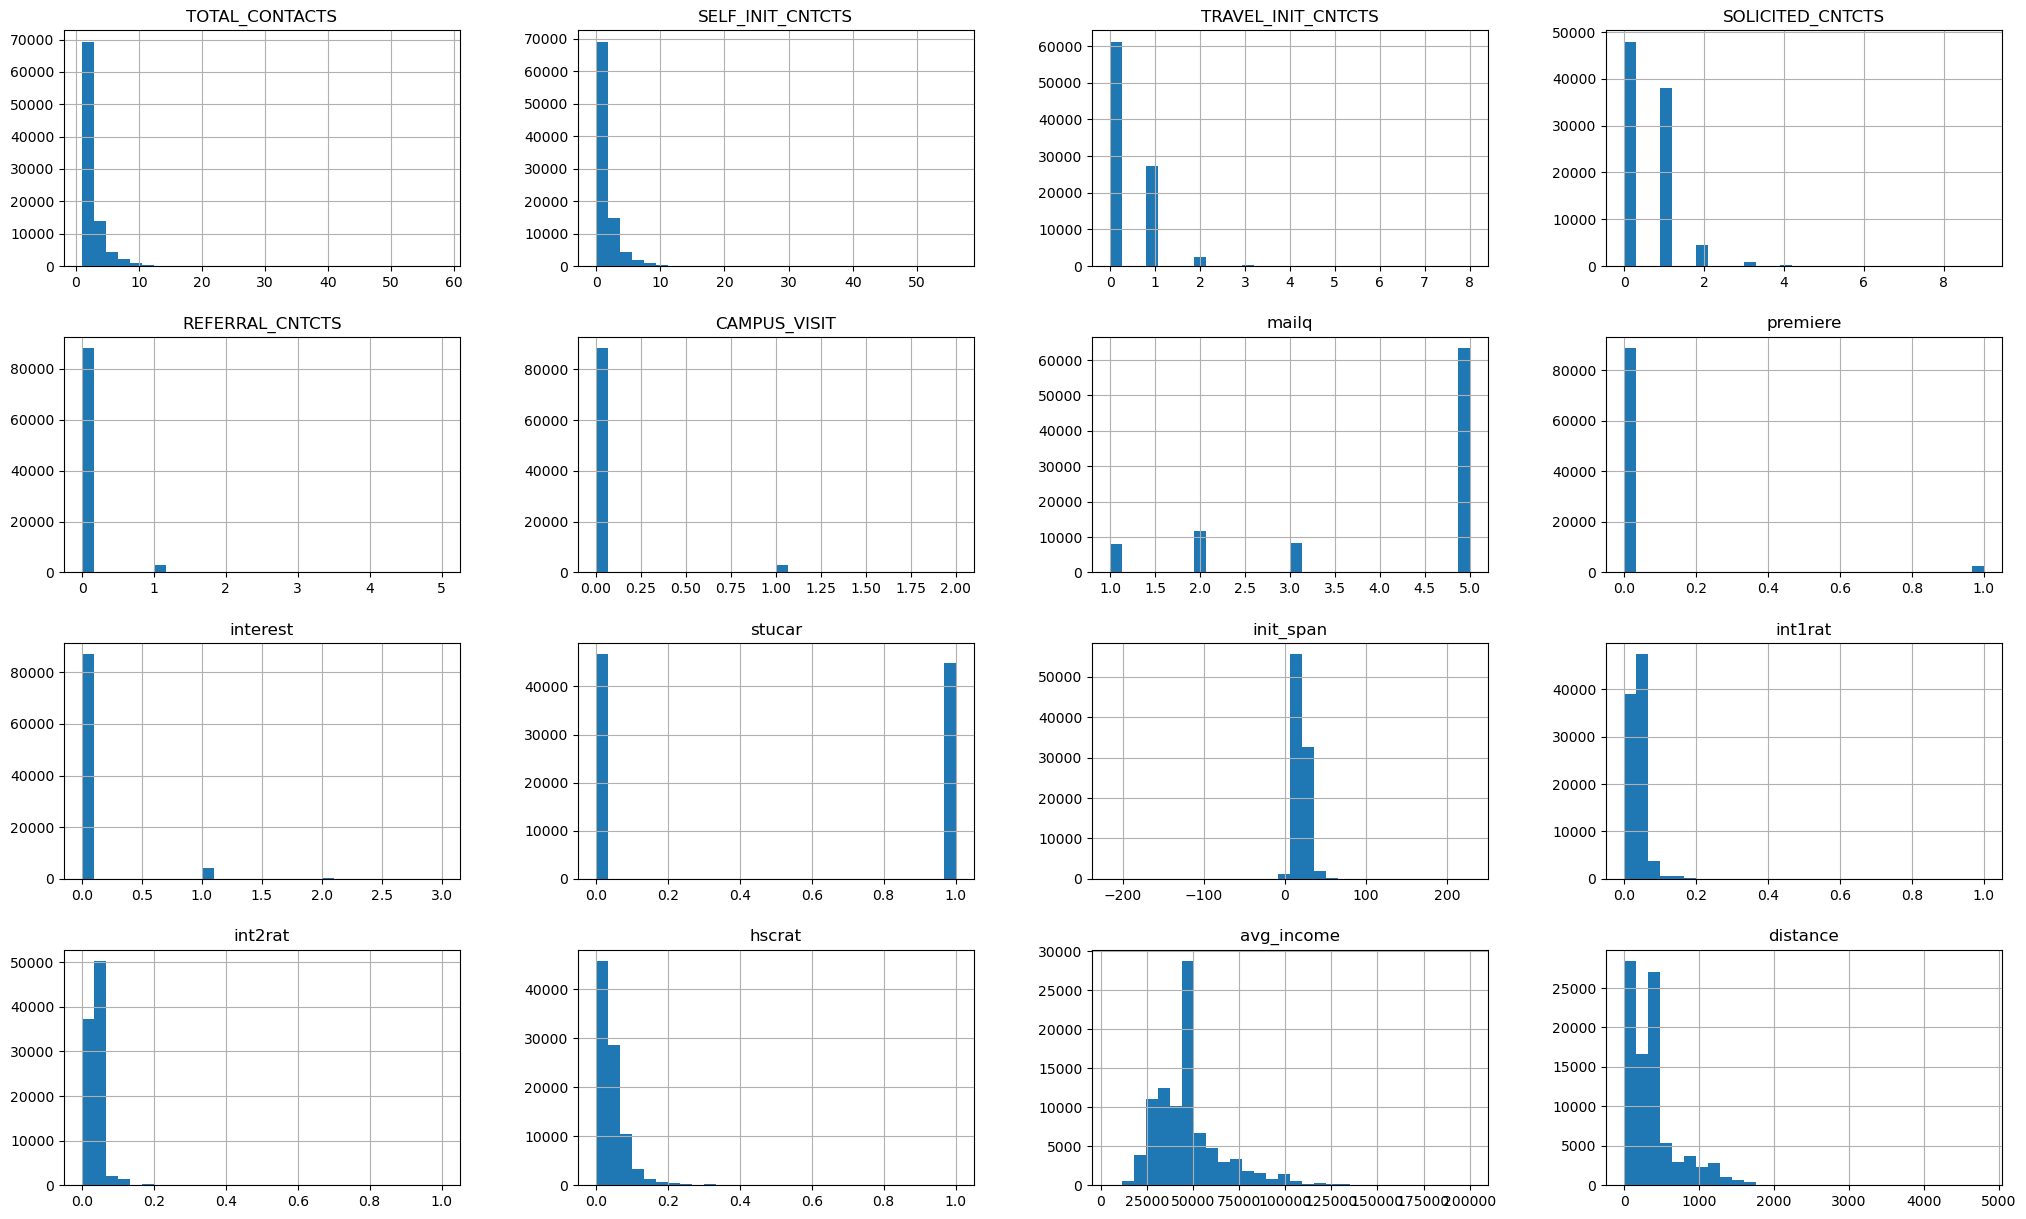

In [15]:
## check for skewness of variables

xQA.hist(bins=30, figsize=(25,15))

In [16]:
## check which skewed variables have zero values to not include them in Log Transformation

if all(item != 0 for item in xQA['SELF_INIT_CNTCTS']):
    print('SELF_INIT_CNTCTS','has no Zeros')
else:
    print('SELF_INIT_CNTCTS','has zeros')
    
###

if all(item != 0 for item in xQA['TOTAL_CONTACTS']):
    print('TOTAL_CONTACTS','has no Zeros')
else:
    print('TOTAL_CONTACTS','has zeros')
    
###

if all(item != 0 for item in xQA['avg_income']):
    print('avg_income','has no Zeros')
else:
    print('avg_income','has zeros')
    
###

if all(item != 0 for item in xQA['distance']):
    print('distance','has no Zeros')
else:
    print('distance','has zeros')
    
###

if all(item != 0 for item in xQA['hscrat']):

    print('hscrat','has no Zeros')
else:
    print('hscrat','has zeros')

SELF_INIT_CNTCTS has zeros
TOTAL_CONTACTS has no Zeros
avg_income has no Zeros
distance has no Zeros
hscrat has zeros


In [17]:
#xQA['SELF_INIT_CNTCTS'] = np.log10(x['SELF_INIT_CNTCTS']+1) # it has zeros, won't log transform
xQA['TOTAL_CONTACTS'] = np.log10(xQA['TOTAL_CONTACTS']) # it has zeros, won't log transform
xQA['avg_income'] = np.log10(xQA['avg_income'])
xQA['distance'] = np.log10(xQA['distance'])
#xQA['hscrat'] = np.log10(xQA['hscrat']) # it has zeros, won't log transform

array([[<Axes: title={'center': 'TOTAL_CONTACTS'}>,
        <Axes: title={'center': 'SELF_INIT_CNTCTS'}>,
        <Axes: title={'center': 'TRAVEL_INIT_CNTCTS'}>,
        <Axes: title={'center': 'SOLICITED_CNTCTS'}>],
       [<Axes: title={'center': 'REFERRAL_CNTCTS'}>,
        <Axes: title={'center': 'CAMPUS_VISIT'}>,
        <Axes: title={'center': 'mailq'}>,
        <Axes: title={'center': 'premiere'}>],
       [<Axes: title={'center': 'interest'}>,
        <Axes: title={'center': 'stucar'}>,
        <Axes: title={'center': 'init_span'}>,
        <Axes: title={'center': 'int1rat'}>],
       [<Axes: title={'center': 'int2rat'}>,
        <Axes: title={'center': 'hscrat'}>,
        <Axes: title={'center': 'avg_income'}>,
        <Axes: title={'center': 'distance'}>]], dtype=object)

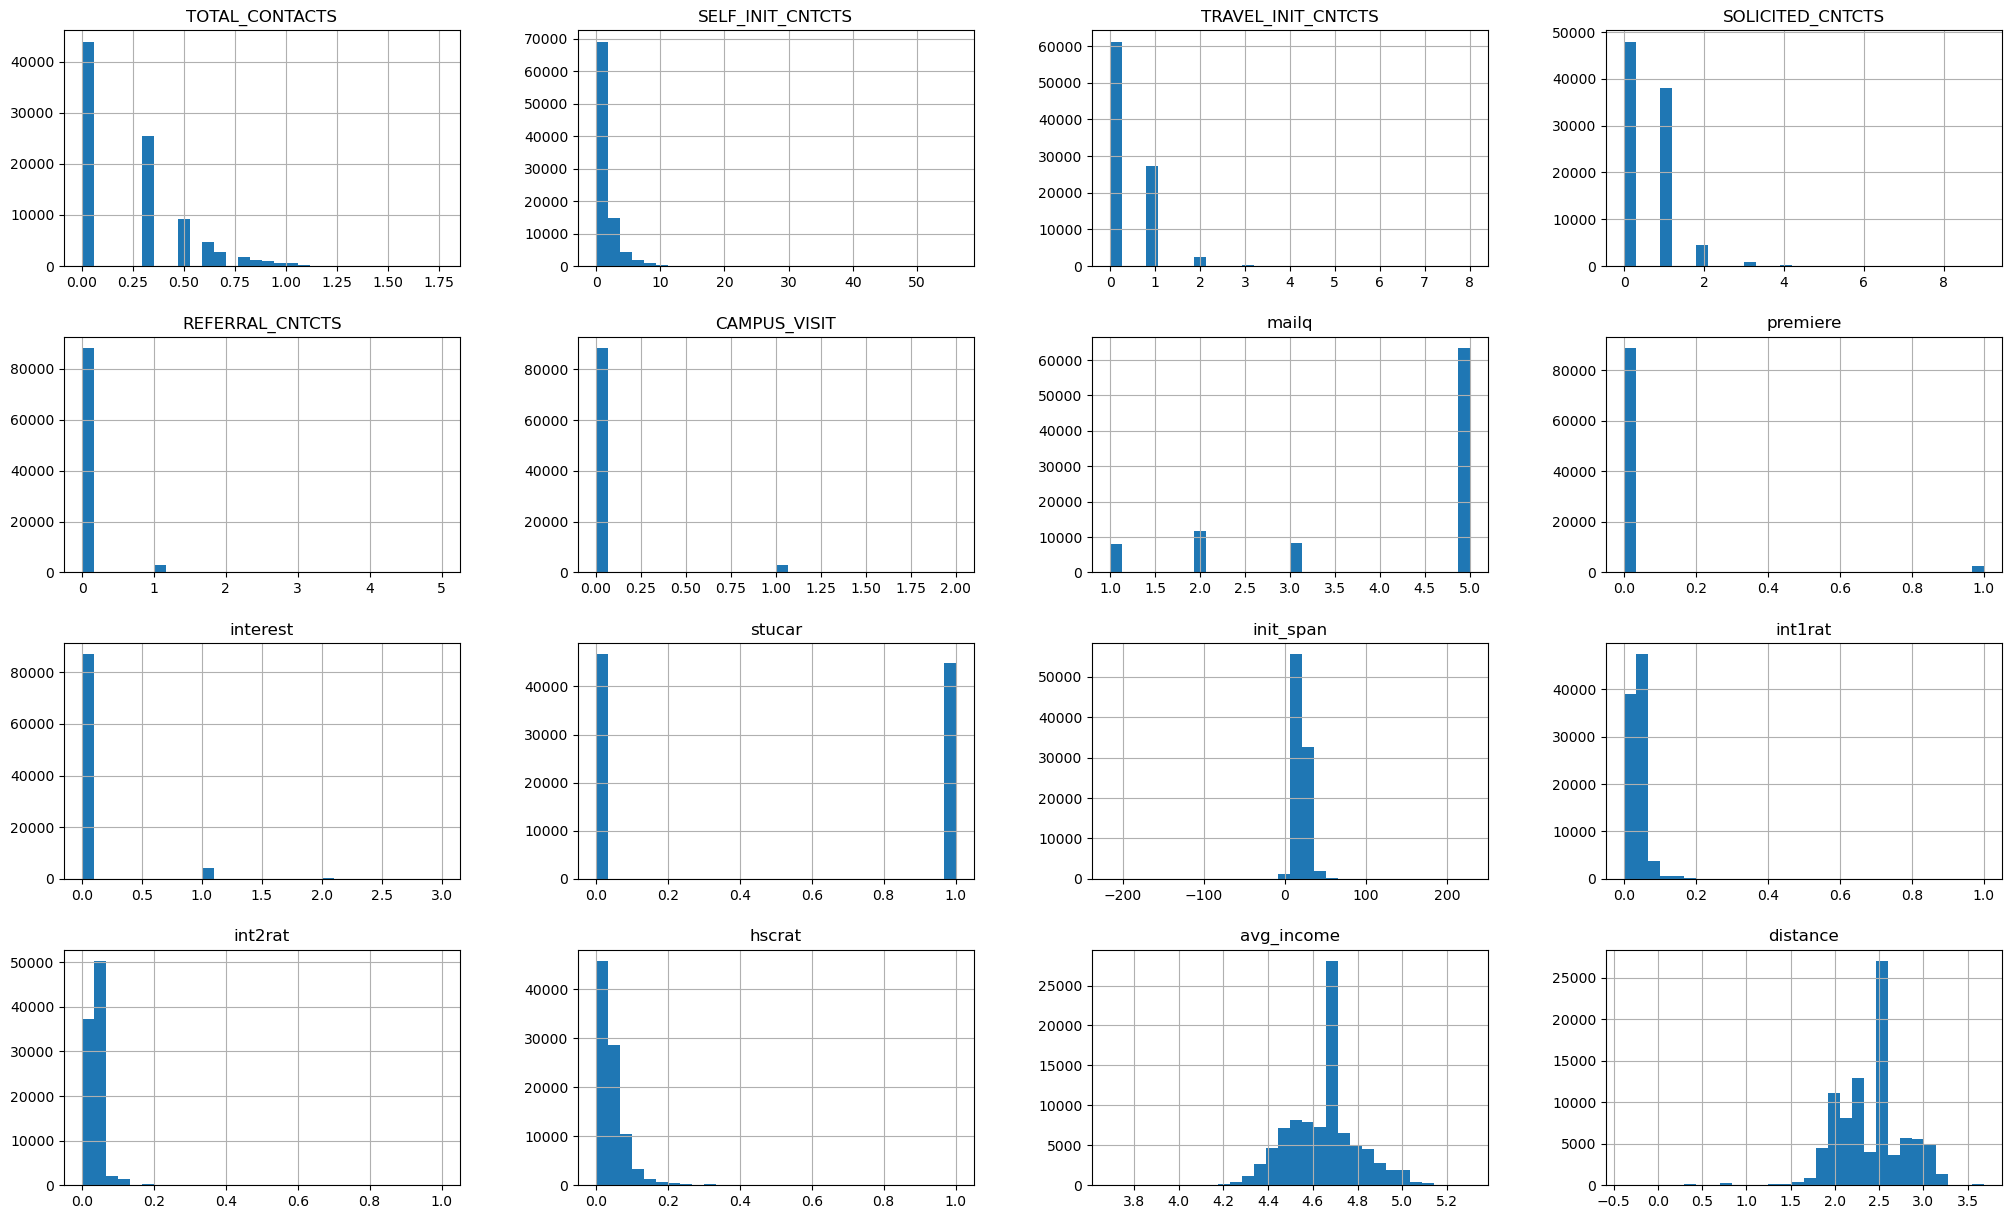

In [18]:
xQA.hist(bins=30, figsize=(25,15))

## Multicollinearity Control (VIF)

In [22]:
# Convert data types to float for VIF calculation

xQA = xQA.astype(float)

In [23]:
vif_data = pd.DataFrame()
vif_data["feature"] = xQA.columns
vif_data["VIF"] = [variance_inflation_factor(xQA.values, i)
                          for i in range(len(xQA.columns))]

print(vif_data)

               feature         VIF
0       TOTAL_CONTACTS   13.088288
1     SELF_INIT_CNTCTS   11.008548
2   TRAVEL_INIT_CNTCTS    3.895256
3     SOLICITED_CNTCTS    3.762391
4      REFERRAL_CNTCTS    1.151808
5         CAMPUS_VISIT    1.253921
6                mailq   19.178718
7             premiere    1.494729
8             interest    1.168806
9               stucar    2.484840
10           init_span    7.028004
11             int1rat    5.993542
12             int2rat    7.751939
13              hscrat    1.594867
14          avg_income  148.294007
15            distance   76.711047
16         TERRITORY_8    3.119488
17         TERRITORY_7    4.706518
18         TERRITORY_6    4.362968
19         TERRITORY_5    5.244342
20         TERRITORY_4    4.563846
21         TERRITORY_3    4.432418
22         TERRITORY_2    5.327064
23         TERRITORY_1    4.589690
24         TERRITORY_0    1.001927
25         TERRITORY_N    1.930202
26           Instate_N    6.145224


In [24]:
#Dropping variables with VIF above 10, distance and avg_income were log transformed but still have high VIF, so dropping them as well.

xQA=xQA.drop(columns=['TOTAL_CONTACTS', 'mailq', 'distance','avg_income']) 

In [25]:
vif_data = pd.DataFrame()
vif_data["feature"] = xQA.columns
vif_data["VIF"] = [variance_inflation_factor(xQA.values, i)
                          for i in range(len(xQA.columns))]

print(vif_data)

               feature       VIF
0     SELF_INIT_CNTCTS  2.792734
1   TRAVEL_INIT_CNTCTS  1.828763
2     SOLICITED_CNTCTS  2.278257
3      REFERRAL_CNTCTS  1.060492
4         CAMPUS_VISIT  1.200368
5             premiere  1.413959
6             interest  1.157152
7               stucar  2.342716
8            init_span  6.407183
9              int1rat  5.343419
10             int2rat  6.558574
11              hscrat  1.568475
12         TERRITORY_8  1.986658
13         TERRITORY_7  2.654364
14         TERRITORY_6  2.321394
15         TERRITORY_5  2.911083
16         TERRITORY_4  2.504083
17         TERRITORY_3  2.416881
18         TERRITORY_2  3.059717
19         TERRITORY_1  2.402424
20         TERRITORY_0  1.000700
21         TERRITORY_N  1.445848
22           Instate_N  3.116390


## Model Development

In [26]:
# define dependent variable and features

yQA=dfQA['Enroll']

### Logistic Regression

In [27]:
# Data partition: to split data into training data and validation data

from sklearn.model_selection import train_test_split
xQA_train, xQA_val, yQA_train, yQA_val = train_test_split(xQA,yQA, test_size=0.3,random_state=0)

In [28]:
# Training a Logistic Regression Model

log_regQA = sm.Logit(yQA_train, xQA_train).fit()

print(log_regQA.summary()) 

         Current function value: 0.072793
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Enroll   No. Observations:                64037
Model:                          Logit   Df Residuals:                    64014
Method:                           MLE   Df Model:                           22
Date:                Sat, 21 Feb 2026   Pseudo R-squ.:                  0.4842
Time:                        02:13:56   Log-Likelihood:                -4661.4
converged:                      False   LL-Null:                       -9038.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
SELF_INIT_CNTCTS       0.5025      0.015     33.821      0.000       0.473       0.532
TRAVEL_INIT_CNTCTS     0.1566      0.046 

c:\Users\qusai\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Logistic Regression Summary

The logistic regression model shows strong predictive performance (Pseudo R² = 0.48, p < 0.001), indicating substantial improvement over the null model. Engagement-related variables such as **CAMPUS_VISIT**, **premiere**, **stucar**, and **SELF_INIT_CNTCTS** are strong positive and statistically significant predictors of enrollment. 

The model did not fully converge (maximum iterations exceeded), likely due to sparse categories (e.g., extreme coefficients in some TERRITORY levels), suggesting minor instability in certain estimates. Overall, student engagement intensity appears to be the strongest driver of enrollment probability.

### Decistion Tree

In [33]:
# Train a descition tree model

dtreeQA = tree.DecisionTreeClassifier(max_depth=4,min_samples_split=30)
dtreeQA = dtreeQA.fit(xQA_train, yQA_train)

|--- SELF_INIT_CNTCTS <= 4.50
|   |--- SELF_INIT_CNTCTS <= 2.50
|   |   |--- hscrat <= 0.58
|   |   |   |--- SELF_INIT_CNTCTS <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- SELF_INIT_CNTCTS >  1.50
|   |   |   |   |--- class: 0
|   |   |--- hscrat >  0.58
|   |   |   |--- class: 1
|   |--- SELF_INIT_CNTCTS >  2.50
|   |   |--- hscrat <= 0.09
|   |   |   |--- hscrat <= 0.02
|   |   |   |   |--- class: 0
|   |   |   |--- hscrat >  0.02
|   |   |   |   |--- class: 0
|   |   |--- hscrat >  0.09
|   |   |   |--- hscrat <= 0.29
|   |   |   |   |--- class: 0
|   |   |   |--- hscrat >  0.29
|   |   |   |   |--- class: 1
|--- SELF_INIT_CNTCTS >  4.50
|   |--- hscrat <= 0.03
|   |   |--- hscrat <= 0.00
|   |   |   |--- class: 0
|   |   |--- hscrat >  0.00
|   |   |   |--- premiere <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- premiere >  0.50
|   |   |   |   |--- class: 0
|   |--- hscrat >  0.03
|   |   |--- stucar <= 0.50
|   |   |   |--- class: 0
|   |   |--- stucar >  0.50
| 

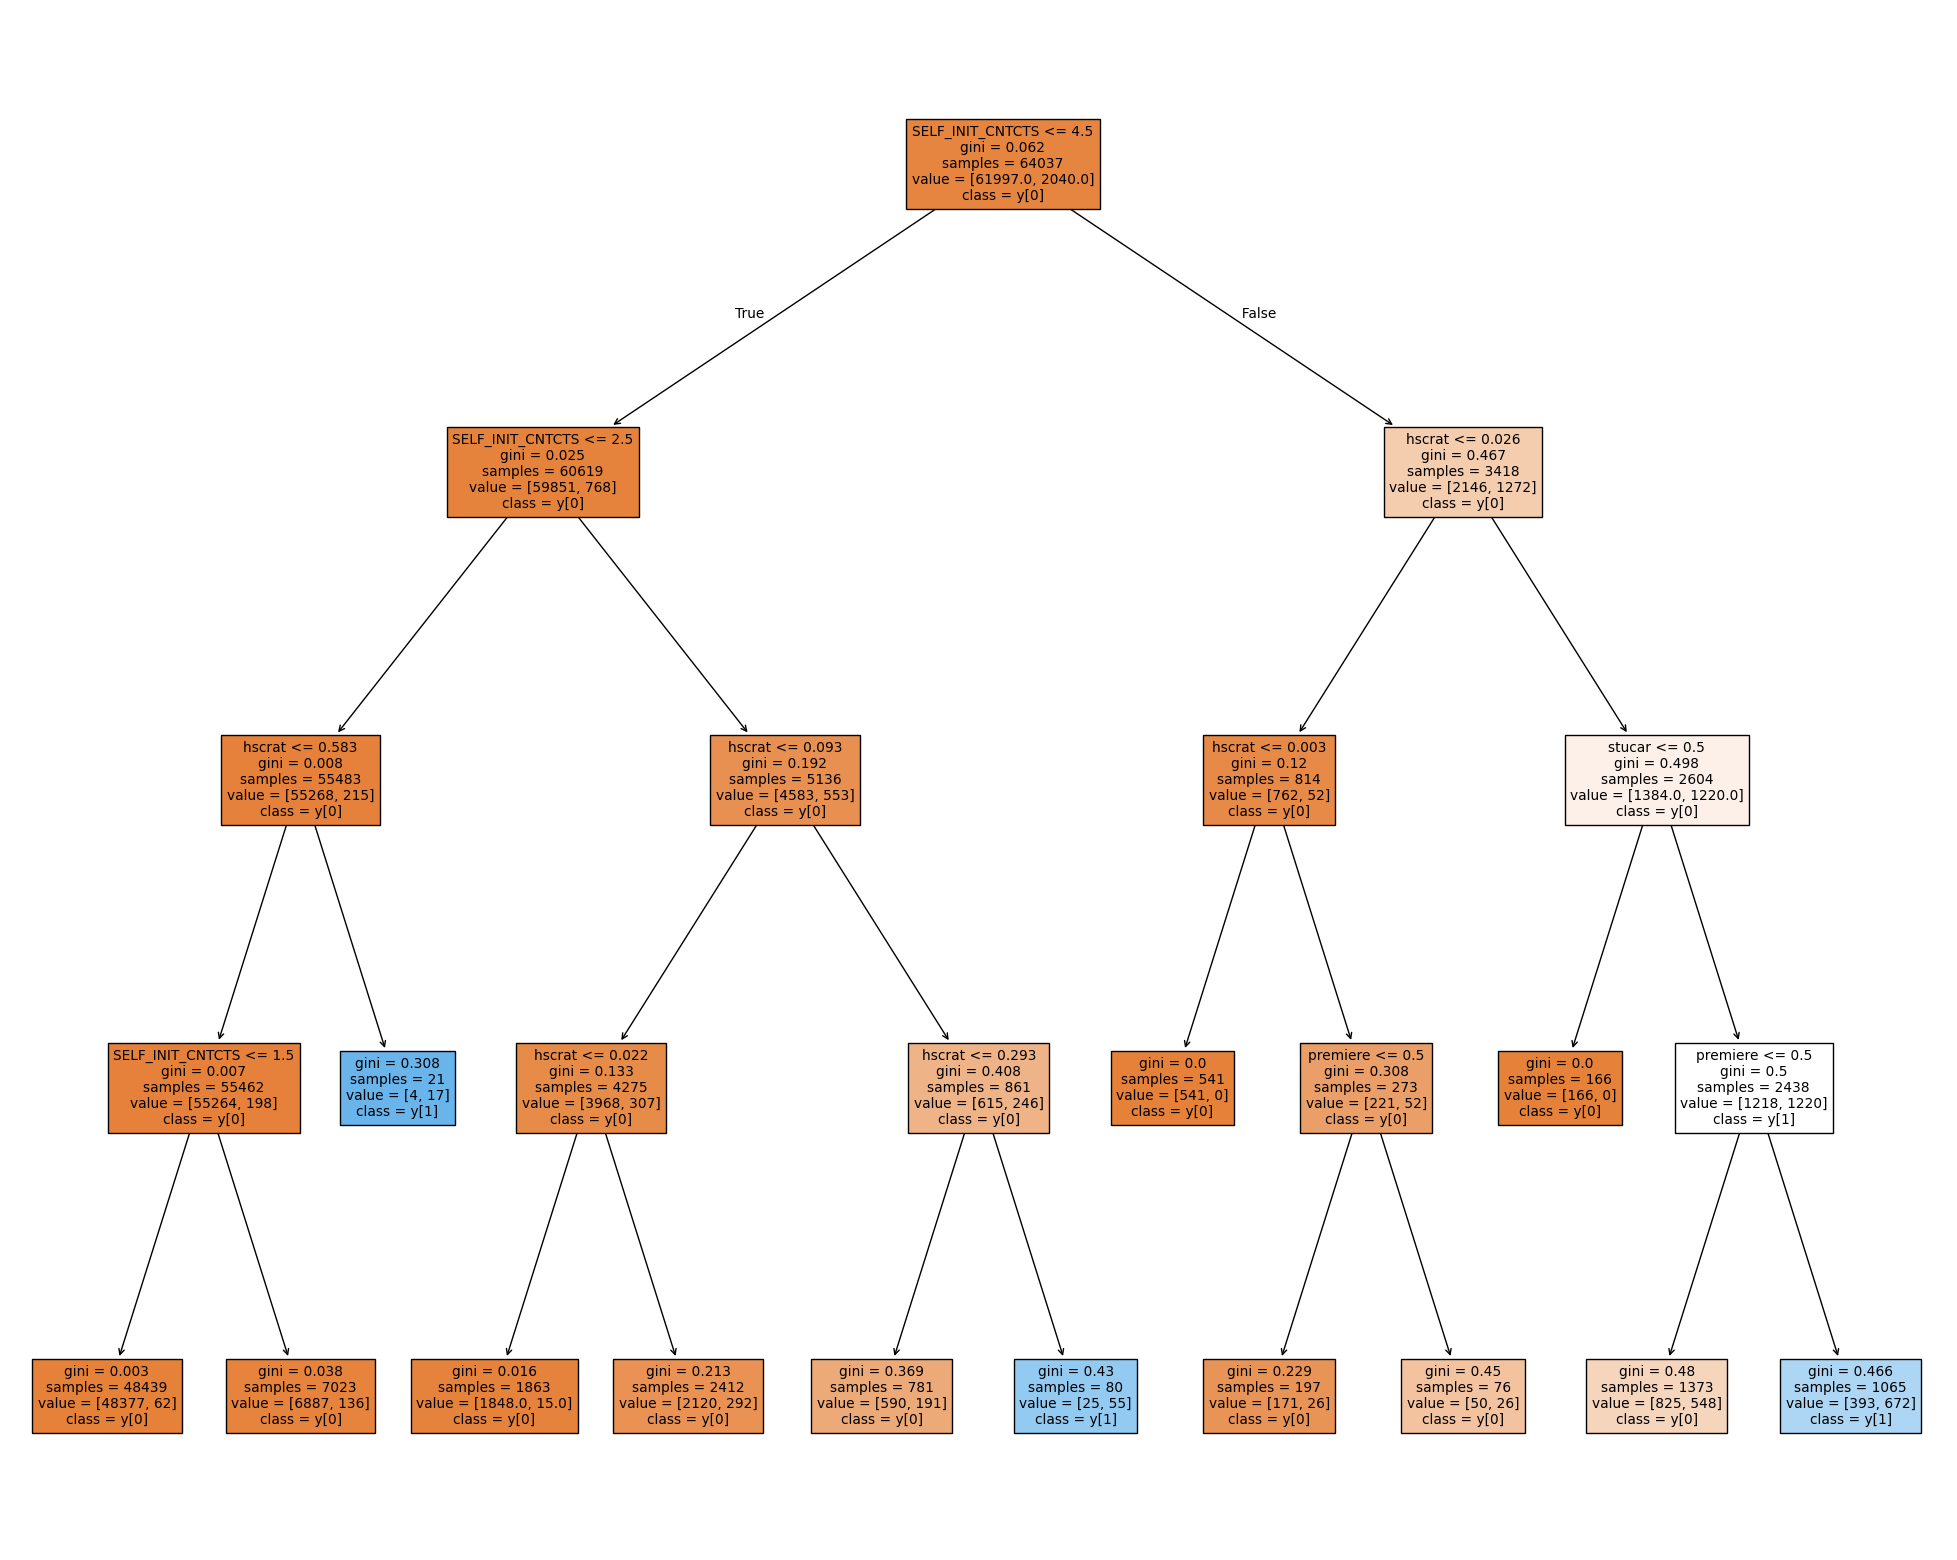

In [34]:
# Display decision tree results
r = export_text(dtreeQA, feature_names=list(xQA_train.columns.values))
print(r)

from matplotlib import pyplot as plt
plt.figure(figsize=[25,20])
tree.plot_tree(dtreeQA,
               feature_names=list(xQA_train.columns.values),
               class_names=True,
               filled=True)
plt.show()

#### Decision Tree Summary

The decision tree identifies **SELF_INIT_CNTCTS** as the primary splitting variable, indicating that student-initiated contact is the strongest predictor of enrollment. Subsequent splits involve academic performance metrics (e.g., **hscrat**) and engagement indicators such as **premiere** and **stucar**, reinforcing the importance of both academic readiness and institutional engagement.

The tree structure highlights clear segmentation patterns: students with low engagement are predominantly classified as non-enrollees, while higher levels of engagement and participation significantly increase the probability of enrollment. Overall, the model provides an interpretable, rule-based framework for identifying high-yield student segments.

## Model Evaluation


### Logistic Regression

In [29]:
# Model prediction based on the valuation dataset

prediction_prob = log_regQA.predict(xQA_val)
prediction = list(map(round, prediction_prob))
confusion_matrix(yQA_val,prediction)

array([[26419,   198],
       [  500,   328]], dtype=int64)

Logistic: ROC AUC=0.963


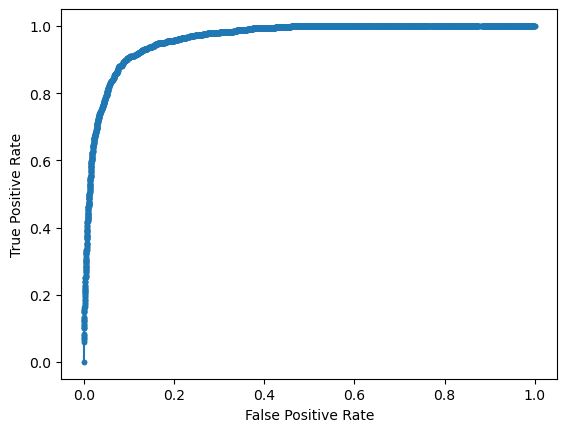

In [31]:
# Model valuation: ROC

# calculate AUC scores
lr_auc = roc_auc_score(yQA_val, prediction_prob)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(yQA_val, prediction_prob)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

#### ROC Curve Summary

The logistic regression model achieves an **ROC-AUC of 0.963**, indicating excellent discriminative ability. The ROC curve rises sharply toward the top-left corner, demonstrating a high true positive rate with relatively low false positive rates across thresholds. 

An AUC above 0.90 reflects outstanding model performance, suggesting the model is highly effective at distinguishing between students who enroll and those who do not.

### Decision Tree

In [35]:
#Criteria 1: the confusion matrix

prediction =dtreeQA.predict(xQA_val)
confusion_matrix(yQA_val,prediction)

array([[26423,   194],
       [  494,   334]], dtype=int64)

In [36]:
#Criteria 2: the ROC curve and area under the curve

prediction_prob = dtreeQA.predict_proba(xQA_val)

# calculate AUC scores
# only keeps the probabilities of one class, since tree models can be used for multi
tree_auc = roc_auc_score(yQA_val, prediction_prob[:,1])
print('Decision Tree: ROC AUC=%.3f' % (tree_auc))

Decision Tree: ROC AUC=0.959


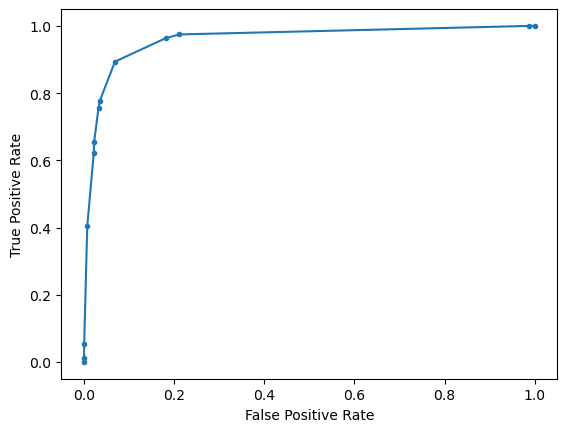

In [37]:
# calculate roc curves
tree_fpr, tree_tpr, _ = roc_curve(yQA_val, prediction_prob[:,1])
# plot the roc curve for the model
plt.plot(tree_fpr, tree_tpr, marker='.')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

#### Decision Tree ROC Summary

The ROC curve for the decision tree model demonstrates strong classification performance, with the curve rising sharply toward the top-left corner. This indicates that the model achieves a high true positive rate while maintaining relatively low false positive rates across decision thresholds.

Overall, the decision tree shows strong discriminative ability in distinguishing enrolled from non-enrolled students, reinforcing the importance of engagement and academic features identified in the tree structure.